### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 6

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Коняева Марина Александровна
##### Группа:   НФИбд-01-21

## Москва 2024
***

## Вариант № 1

1. Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов.

In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [261]:
# считываем данные из репозитария UCI
url = 'anneal.data'
my_data = pd.read_csv(url, header=None)
my_data

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,?,C,A,8,0,?,S,?,0,?,...,?,?,COIL,0.700,610.0,0,?,0,?,3
1,?,C,R,0,0,?,S,2,0,?,...,?,?,COIL,3.200,610.0,0,?,0,?,3
2,?,C,R,0,0,?,S,2,0,?,...,?,?,SHEET,0.700,1300.0,762,?,0,?,3
3,?,C,A,0,60,T,?,?,0,?,...,?,?,COIL,2.801,385.1,0,?,0,?,3
4,?,C,A,0,60,T,?,?,0,?,...,?,?,SHEET,0.801,255.0,269,?,0,?,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,?,C,A,0,50,T,?,?,0,?,...,?,?,COIL,1.001,50.0,0,Y,0,?,3
794,?,C,?,0,0,?,S,1,0,?,...,?,?,SHEET,0.699,1300.0,4880,?,0,?,3
795,?,C,A,0,0,?,S,2,0,?,...,?,?,COIL,0.400,609.9,0,?,0,?,3
796,?,C,A,0,0,?,S,2,0,?,...,?,?,SHEET,3.200,610.0,4880,?,0,?,3


Класс: classes (столбец No 39) 

In [262]:
my_data = my_data.rename(columns={38: "class"})
my_data

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,class
0,?,C,A,8,0,?,S,?,0,?,...,?,?,COIL,0.700,610.0,0,?,0,?,3
1,?,C,R,0,0,?,S,2,0,?,...,?,?,COIL,3.200,610.0,0,?,0,?,3
2,?,C,R,0,0,?,S,2,0,?,...,?,?,SHEET,0.700,1300.0,762,?,0,?,3
3,?,C,A,0,60,T,?,?,0,?,...,?,?,COIL,2.801,385.1,0,?,0,?,3
4,?,C,A,0,60,T,?,?,0,?,...,?,?,SHEET,0.801,255.0,269,?,0,?,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,?,C,A,0,50,T,?,?,0,?,...,?,?,COIL,1.001,50.0,0,Y,0,?,3
794,?,C,?,0,0,?,S,1,0,?,...,?,?,SHEET,0.699,1300.0,4880,?,0,?,3
795,?,C,A,0,0,?,S,2,0,?,...,?,?,COIL,0.400,609.9,0,?,0,?,3
796,?,C,A,0,0,?,S,2,0,?,...,?,?,SHEET,3.200,610.0,4880,?,0,?,3


2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Преобразуйте категориальные признаки в числовые при помощи кодирования меток (label encoding). Если в признаках имеются пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании. Если в признаках пропущенных значений нет, то удалите из набора данных записи, идентифицированные как выбросы при помощи метода кластеризации DBSCAN.

Метод обработки пропущенных значений – среднее значение признака

In [263]:
# среди меток класса отсуствуют пропущенные значения
my_data['class'].isnull().sum(axis=0)

0

In [264]:
# проверим категориальные признаки
my_data.dtypes

0         object
1         object
2         object
3          int64
4          int64
5         object
6         object
7         object
8          int64
9         object
10        object
11        object
12        object
13        object
14        object
15        object
16        object
17        object
18        object
19        object
20        object
21        object
22        object
23        object
24        object
25        object
26        object
27        object
28        object
29        object
30        object
31        object
32       float64
33       float64
34         int64
35        object
36         int64
37        object
class     object
dtype: object

In [265]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {} # экземпляр LabelEncoder для каждого категориального столбца
categorical_columns = [0,1,2,5,6,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,35]

for col in categorical_columns:
    le = LabelEncoder()
    my_data[col] = le.fit_transform(my_data[col])
    label_encoders[col] = le

In [266]:
my_data[:798] = my_data[:798].replace('?', np.nan) 
my_data

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,class
0,0,0,1,8,0,0,2,NaN,0,0,...,0,0,0,0.700,610.0,0,0,0,NaN,3
1,0,0,4,0,0,0,2,2,0,0,...,0,0,0,3.200,610.0,0,0,0,NaN,3
2,0,0,4,0,0,0,2,2,0,0,...,0,0,1,0.700,1300.0,762,0,0,NaN,3
3,0,0,1,0,60,1,0,NaN,0,0,...,0,0,0,2.801,385.1,0,0,0,NaN,3
4,0,0,1,0,60,1,0,NaN,0,0,...,0,0,1,0.801,255.0,269,0,0,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,0,0,1,0,50,1,0,NaN,0,0,...,0,0,0,1.001,50.0,0,2,0,NaN,3
794,0,0,0,0,0,0,2,1,0,0,...,0,0,1,0.699,1300.0,4880,0,0,NaN,3
795,0,0,1,0,0,0,2,2,0,0,...,0,0,0,0.400,609.9,0,0,0,NaN,3
796,0,0,1,0,0,0,2,2,0,0,...,0,0,1,3.200,610.0,4880,0,0,NaN,3


In [267]:
for col in my_data.columns[:798]:
    my_data[col] = pd.to_numeric(my_data[col], errors='coerce')

# замена NaN на средние значения для каждого класса
for col in my_data.columns[:798]:
    my_data[col].fillna(my_data[col].mean(), inplace=True) 
    
my_data

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,class
0,0,0,1,8,0,0,2,2.223301,0,0,...,0,0,0,0.700,610.0,0,0,0,2.888889,3.0
1,0,0,4,0,0,0,2,2.000000,0,0,...,0,0,0,3.200,610.0,0,0,0,2.888889,3.0
2,0,0,4,0,0,0,2,2.000000,0,0,...,0,0,1,0.700,1300.0,762,0,0,2.888889,3.0
3,0,0,1,0,60,1,0,2.223301,0,0,...,0,0,0,2.801,385.1,0,0,0,2.888889,3.0
4,0,0,1,0,60,1,0,2.223301,0,0,...,0,0,1,0.801,255.0,269,0,0,2.888889,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,0,0,1,0,50,1,0,2.223301,0,0,...,0,0,0,1.001,50.0,0,2,0,2.888889,3.0
794,0,0,0,0,0,0,2,1.000000,0,0,...,0,0,1,0.699,1300.0,4880,0,0,2.888889,3.0
795,0,0,1,0,0,0,2,2.000000,0,0,...,0,0,0,0.400,609.9,0,0,0,2.888889,3.0
796,0,0,1,0,0,0,2,2.000000,0,0,...,0,0,1,3.200,610.0,4880,0,0,2.888889,3.0


In [268]:
# категориальные значения закодированы числовыми значениями
my_data.dtypes

0          int32
1          int32
2          int32
3          int64
4          int64
5          int32
6          int32
7        float64
8          int64
9          int32
10         int32
11         int32
12         int32
13         int32
14         int32
15         int32
16         int32
17         int32
18         int32
19         int32
20         int32
21         int32
22         int32
23         int32
24         int32
25         int32
26         int32
27         int32
28         int32
29         int32
30         int32
31         int32
32       float64
33       float64
34         int64
35         int32
36         int64
37       float64
class    float64
dtype: object

3. Используя метод снижения размерности данных, указанный в индивидуальном задании, определите и оставьте в наборе данных не более четырех признаков.

Алгоритм снижения размерности данных – отбор на основе важности признаков (ExtraTreesClassifier) 

In [269]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = my_data.drop('class', axis=1)
y = my_data['class']

if y.dtypes == 'float64' or y.dtypes == 'int64':
    le = LabelEncoder()
    y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

# Используем ExtraTreesClassifier для отбора признаков
model = ExtraTreesClassifier(n_estimators=100, random_state=666)
model.fit(X_train, y_train)

# Оценка важности признаков
importances = model.feature_importances_

# Сортировка признаков по важности
indices = np.argsort(importances)[::-1]

# Отбор четырех наиболее важных признаков
top_4_features = X.columns[indices][:4]

# Создаем новый набор данных с этими признаками
my_data_new = my_data[top_4_features]

# Добавляем столбец с метками класса
my_data_new['class'] = my_data['class']

# Выводим итоговый набор данных
print("Четыре наиболее важных признака:", top_4_features)
my_data_new

Четыре наиболее важных признака: Index([11, 4, 6, 24], dtype='object')


,11,4,6,24,class
0,4,0,2,0,3.0
1,2,0,2,0,3.0
2,2,0,2,0,3.0
3,4,60,0,0,3.0
4,4,60,0,0,3.0
...,...,...,...,...,...
793,4,50,0,0,3.0
794,4,0,2,0,3.0
795,2,0,2,0,3.0
796,4,0,2,0,3.0


In [270]:
# Проверим правильность выполнения алгоритма для отбора важности признаков
for i in range(len(importances)):
    print(f"Признак {X.columns[indices[i]]} важность: {importances[indices[i]]}")

Признак 11 важность: 0.2230589770057855
Признак 4 важность: 0.0910324748728537
Признак 6 важность: 0.0662238490176769
Признак 24 важность: 0.06496629361224206
Признак 2 важность: 0.06435685607887999
Признак 0 важность: 0.05702965615893349
Признак 32 важность: 0.05307440061987426
Признак 19 важность: 0.04737124068647118
Признак 8 важность: 0.041179273467204305
Признак 7 важность: 0.0376881316212877
Признак 9 важность: 0.03536630674246406
Признак 33 важность: 0.031153033813375076
Признак 3 важность: 0.02670907950708196
Признак 5 важность: 0.023512115104348058
Признак 31 важность: 0.02209433052122592
Признак 10 важность: 0.01493759642377403
Признак 12 важность: 0.013638142084655329
Признак 15 важность: 0.013398084240662361
Признак 34 важность: 0.012775337665783303
Признак 16 важность: 0.011962507851143663
Признак 14 важность: 0.009509357660404224
Признак 21 важность: 0.007981192821255898
Признак 20 важность: 0.006519494952491954
Признак 35 важность: 0.005398734600978151
Признак 17 важност

4. Нормализуйте оставшиеся признаки набора данных методом, указанным в индивидуальном задании.

Метод нормализации признаков – нормировка по норме L1 

In [271]:
from sklearn.preprocessing import Normalizer

# Нормировка данных по L1
scaler = Normalizer(norm='l1')
X_normalized = scaler.fit_transform(my_data_new.drop('class', axis=1))

# Создаем DataFrame для нормализованных данных
X_normalized_df = pd.DataFrame(X_normalized, columns=top_4_features)
X_normalized_df['class'] = my_data_new['class']
X_normalized_df

,11,4,6,24,class
0,0.666667,0.000000,0.333333,0.0,3.0
1,0.500000,0.000000,0.500000,0.0,3.0
2,0.500000,0.000000,0.500000,0.0,3.0
3,0.062500,0.937500,0.000000,0.0,3.0
4,0.062500,0.937500,0.000000,0.0,3.0
...,...,...,...,...,...
793,0.074074,0.925926,0.000000,0.0,3.0
794,0.666667,0.000000,0.333333,0.0,3.0
795,0.500000,0.000000,0.500000,0.0,3.0
796,0.666667,0.000000,0.333333,0.0,3.0


In [272]:
my_data_new = my_data[[11, 4, 6, 24]]
my_data_new

,11,4,6,24
0,4,0,2,0
1,2,0,2,0
2,2,0,2,0
3,4,60,0,0
4,4,60,0,0
...,...,...,...,...
793,4,50,0,0
794,4,0,2,0
795,2,0,2,0
796,4,0,2,0




5. Визуализируйте набор данных в виде точек в трехмерном пространстве, отображая точки разных классов разными цветами. При визуализации набора данных используйте три признака с наиболее высокой оценкой важности. В качестве подписей осей используйте названия признаков. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.

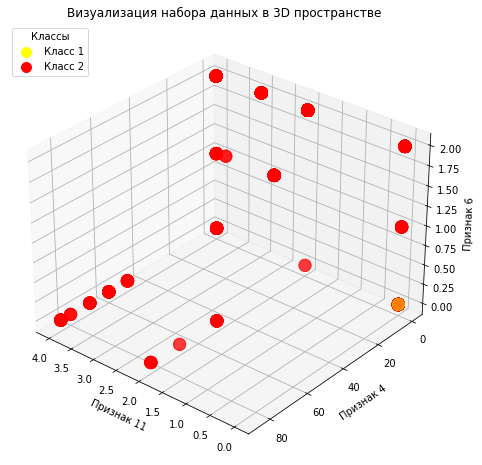

In [273]:
#Три признака с наиболее высокой оценкой важности 
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

# Извлекаем данные для трех признаков с наивысшей важностью
xs = my_data_new[11]  
ys = my_data_new[4]  
zs = my_data_new[6]   


colors = np.where(y == 0, 'yellow', 'red')

# Создаем рассеянный график с прозрачностью
scatter = ax.scatter(xs, ys, zs, c=colors, s=150, alpha=0.5)
ax.scatter([], [], [], color='yellow', s=100, label='Класс 1')
ax.scatter([], [], [], color='red', s=100, label='Класс 2')
#ax.scatter([], [], [], color='green', s=100, label='Класс 3')
ax.legend(title="Классы", loc="upper left")
ax.set_xlabel('Признак 11')
ax.set_ylabel('Признак 4')
ax.set_zlabel('Признак 6')
ax.set_title('Визуализация набора данных в 3D пространстве')

# Установка углов обзора
ax.view_init(azim=130, elev=30)
plt.show()

# Первый класс сливается со вторым, образуя оранжевые точки на рисунках при различных поворотах

6. Разбейте набор данных на обучающую и тестовую выборки. Создайте и обучите классификатор на основе деревьев решений с глубиной дерева не более 4, определите долю верных ответов на тестовой выборке и визуализируйте границу принятия решений и построенное дерево решений. При визуализации границы принятия решений используйте два признака с наиболее высокой оценкой важности.

In [274]:
def my_train_test_split(X, y, test_ratio=0.3, seed=None):
    """возвращает X_train, X_test, y_train, y_test"""
    assert X.shape[0] == y.shape[0], \
        "Размер X должен быть равен размеру y"
    assert 0.0 <= test_ratio <= 1.0, \
        "test_ratio должен быть в допустимых пределах"

    if seed:
        y_train_test_split
        np.random.seed(seed)

    shuffled_indexes = np.random.permutation(len(X))

    test_size = int(len(X) * test_ratio)
    test_indexes = shuffled_indexes[:test_size]
    train_indexes = shuffled_indexes[test_size:]

    X_train = X[train_indexes]
    y_train = y[train_indexes]

    X_test = X[test_indexes]
    y_test = y[test_indexes]

    return X_train, X_test, y_train, y_test

In [275]:
XX = my_data_new[top_4_features[:2]].to_numpy()
Y = y
XX.shape, Y.shape

((798, 2), (798,))

In [276]:
X_train, X_test, y_train, y_test = my_train_test_split(XX, Y, 0.3)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((559, 2), (559,), (239, 2), (239,))

In [277]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [278]:
y_pred = dt_clf.predict(X_test)

In [279]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Доля верных решений: %.2f" % accuracy)

Доля верных решений: 0.80


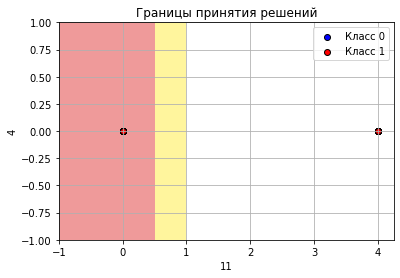

In [280]:
# Обучаем модель на двух признаках
dt_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_clf.fit(XX, Y)

# Функция для отображения границ принятия решений
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

# Установите границы осей на основе ваших данных
plot_decision_boundary(dt_clf, axis=[-1, 1, -1, 1])

# Отображение точек данных
plt.scatter(XX[y==0, 0], XX[y==0, 1], color='blue', label='Класс 0', edgecolor='k')
plt.scatter(XX[y==1, 0], XX[y==1, 1], color='red', label='Класс 1', edgecolor='k')

plt.title("Границы принятия решений")
plt.xlabel('11')
plt.ylabel('4')
plt.legend()
plt.grid()
plt.show()

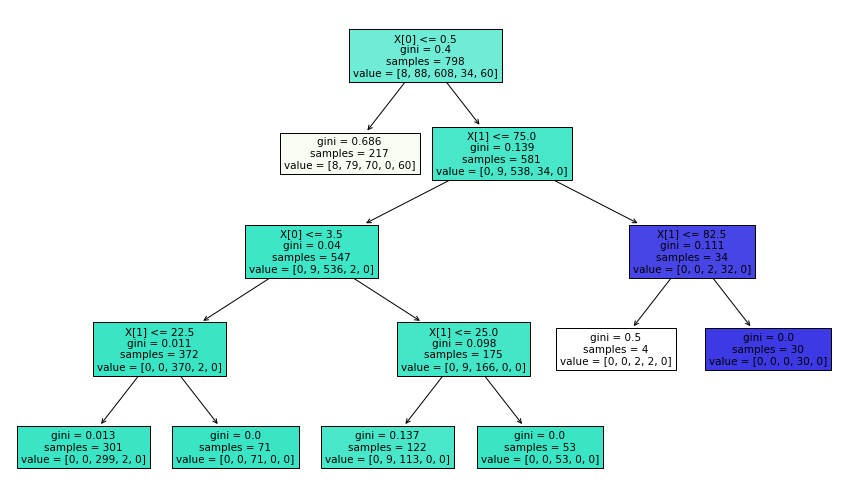

In [281]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 9))
plot_tree(dt_clf,filled=True); 

7. Постройте и обучите дополнительные базовые классификаторы, указанные в индивидуальном задании, затем постройте из классификатора дерева решений и дополнительных классификаторов комбинированный классификатор, указанный в индивидуальном задании. Оцените производительность базовых классификаторов и комбинированного классификатора по показателю, указанному в индивидуальном задании.

Дополнительные базовые классификаторы: 

⁃               классификатор логистической регрессии с полиномиальной зависимостью (degree=3) 

⁃               классификатор метода опорных векторов  

Показатель качества модели – доля верных ответов (accuracy) 

In [282]:
# классификатор логистической регрессии с полиномиальной зависимостью (degree=3) 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_features = PolynomialFeatures(degree=3)
logistic_regression = LogisticRegression(max_iter=1000)
classifier = make_pipeline(poly_features, logistic_regression)
classifier.fit(X_train, y_train)
y_pred_log = classifier.predict(X_test)

In [283]:
# классификатор метода опорных векторов   
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

Комбинированный классификатор: StackingClassifier

In [284]:
from sklearn.ensemble import StackingClassifier

base_classifiers = [
    ('dt', dt_clf),    
    ('svm_clf', SVC(probability=True)),     
    ('svm', classifier) 
]
# Создаем StackingClassifier с базовыми классификаторами
stacking_clf = StackingClassifier(estimators=base_classifiers, final_estimator=DecisionTreeClassifier(random_state=42))
stacking_clf.fit(X_train, y_train)
y_pred_stacking = stacking_clf.predict(X_test)

In [285]:
from sklearn.metrics import precision_score

score_log = accuracy_score(y_test, y_pred_log)
score_svm = accuracy_score(y_test, y_pred_svm)
score_vclf = accuracy_score(y_test, y_pred_stacking)

score_log, score_svm, score_vclf

(0.7782426778242678, 0.7782426778242678, 0.799163179916318)

8. Постройте и обучите пару ансамблевых классификаторов, указанных в индивидуальном задании, и сравните их производительность по показателю, указанному в индивидуальном задании.

Ансамблевые классификаторы: AdaBoostClassifier, GradientBoostingClassifier 

In [286]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=500)
ada_clf.fit(X_train, y_train)
y_pred_ada = ada_clf.predict(X_test)

In [287]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(max_depth=2, n_estimators=30)
gb_clf.fit(X_train, y_train)
y_pred_grad = gb_clf.predict(X_test)

In [288]:
score_ada = accuracy_score(y_test, y_pred_ada)
score_grad = accuracy_score(y_test, y_pred_grad)

score_ada, score_grad

(0.7573221757322176, 0.799163179916318)

9. Постройте границы принятия решений ансамблевых классификаторов с визуализацией точек набора данных разных классов разными цветами. Подпишите оси и рисунок.

In [289]:
#XX = my_data_new.iloc[:, [0, 2]].to_numpy()
data2 = my_data_new[top_4_features[:2]].to_numpy()

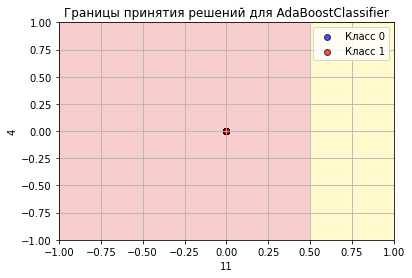

In [290]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Функция для отображения границ принятия решений
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100))
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap, alpha=0.5)

plot_decision_boundary(ada_clf, axis=[-1, 1, -1, 1])

plt.scatter(XX[y==0, 0], XX[y==0, 1], color='blue', label='Класс 0', edgecolor='k', alpha=0.7)
plt.scatter(XX[y==1, 0], XX[y==1, 1], color='red', label='Класс 1', edgecolor='k', alpha=0.7)

plt.title("Границы принятия решений для AdaBoostClassifier")
plt.xlabel('11')
plt.ylabel('4')
plt.xlim(-1, 1)  
plt.ylim(-1, 1) 
plt.legend()
plt.grid()
plt.show()


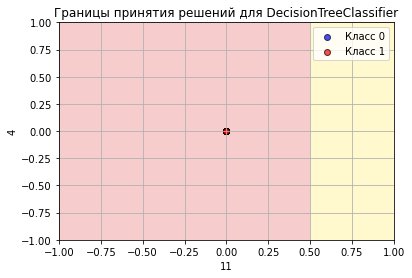

In [291]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Функция для отображения границ принятия решений
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100))
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap, alpha=0.5)

plot_decision_boundary(gb_clf, axis=[-1, 1, -1, 1])

plt.scatter(XX[y==0, 0], XX[y==0, 1], color='blue', label='Класс 0', edgecolor='k', alpha=0.7)
plt.scatter(XX[y==1, 0], XX[y==1, 1], color='red', label='Класс 1', edgecolor='k', alpha=0.7)

plt.title("Границы принятия решений для DecisionTreeClassifier")
plt.xlabel('11')
plt.ylabel('4')
plt.xlim(-1, 1) 
plt.ylim(-1, 1)
plt.legend()
plt.grid()
plt.show()
